# Problem 2

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


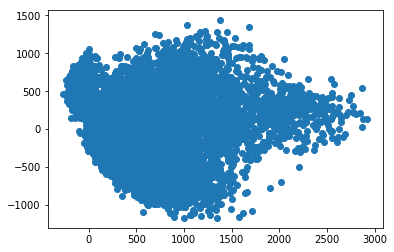

In [2]:
# # Plotting code here
%matplotlib inline
eigen_values, eigen_vectors = np.linalg.eig(np.cov(train_data.T))
np.flip(eigen_values.argsort())
plt.scatter(eigen_vectors[:, 0].real.dot(train_data.T), eigen_vectors[:, 1].real.dot(train_data.T))

In [3]:
train_data = (train_data - np.mean(train_data, axis = 0))
w1 = np.random.rand(784)
learning_rate = 0.01
prev_w = np.zeros(784)
for i in range(1000):
    prev_w = w1
    w1 = w1 + learning_rate * np.dot(np.dot(train_data.T, train_data) , w1)
    w1 = w1 / np.linalg.norm(w1)
    if np.linalg.norm(prev_w - w1) < 0.00001:
        break

In [4]:
sum(w1 - eigen_vectors[:, 0].real)

2.033748531861545e-05

In [5]:
w2 = np.random.rand(784)
prev_w = np.zeros(784)
for i in range(1000):
    prev_w = w2
    tmp = train_data - np.dot(np.matmul(train_data, w1).reshape(-1, 1), w1.reshape(1, 784))
    w2 = w2 + learning_rate * np.dot(np.dot(tmp.T, tmp) , w2)
    w2 = w2 / np.linalg.norm(w2)
    if np.linalg.norm(prev_w - w2) < 0.00001:
        break

In [6]:
sum(w2 - eigen_vectors[:, 1].real)

-1.3029943121536056

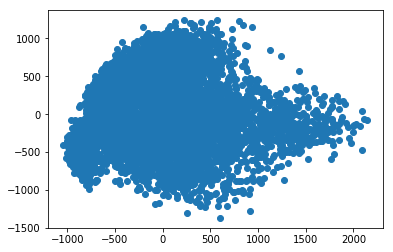

In [7]:
plt.scatter(np.dot(train_data, w1), np.dot(train_data, w2))